In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from segment_anything import sam_model_registry, SamPredictor

In [2]:
sam_checkpoint = "./pretrained_weights/sam_vit_h_4b8939.pth"  # default model

model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

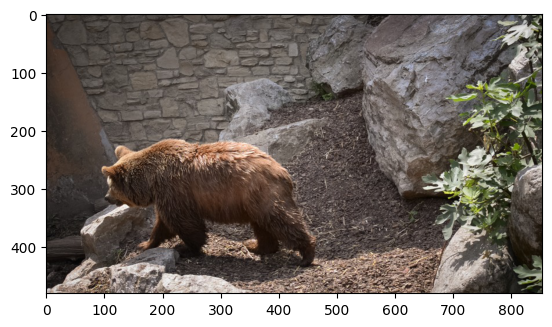

In [3]:
test_img_path = "./sample_data/DAVIS_bear/images/00000.jpg"
image_np = np.array(Image.open(test_img_path).convert("RGB"))

plt.imshow(image_np)

In [4]:
predictor.set_image(image_np)

In [5]:
input_point = np.array([[300, 300]])  # (x, y); DIFFERENT FROM OPENCV COORDINATE
input_label = np.ones((input_point.shape[0], ))

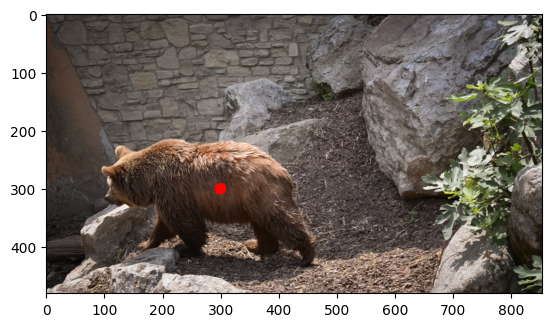

In [6]:
# Visualize point on the image w/ cv2.circle

viz_img = image_np.copy()
for i in range(input_point.shape[0]):
    cv2.circle(viz_img, (input_point[i][0], input_point[i][1]), 10, (255, 0, 0), -1)
plt.imshow(viz_img)

In [7]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)

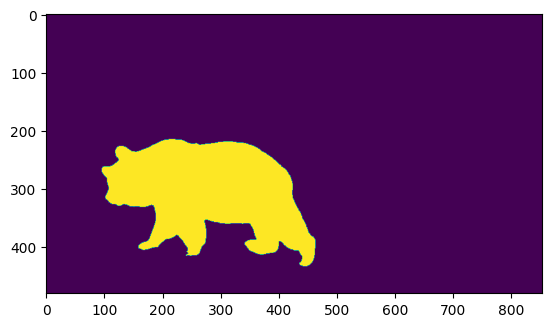

In [8]:
plt.imshow(masks[0])

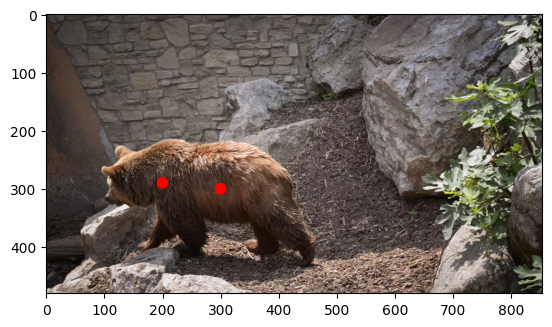

In [9]:
# Multi-point
input_point = np.array([[300, 300], [200, 290]])
input_label = np.array([1, 1])

# Visualize point on the image w/ cv2.circle

viz_img = image_np.copy()
for i in range(input_point.shape[0]):
    cv2.circle(viz_img, (input_point[i][0], input_point[i][1]), 10, (255, 0, 0), -1)
plt.imshow(viz_img)

In [10]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)

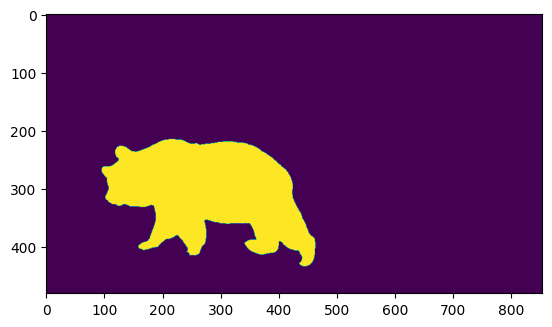

In [11]:
plt.imshow(masks[0])